<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
data = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Data Preprocessing**

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

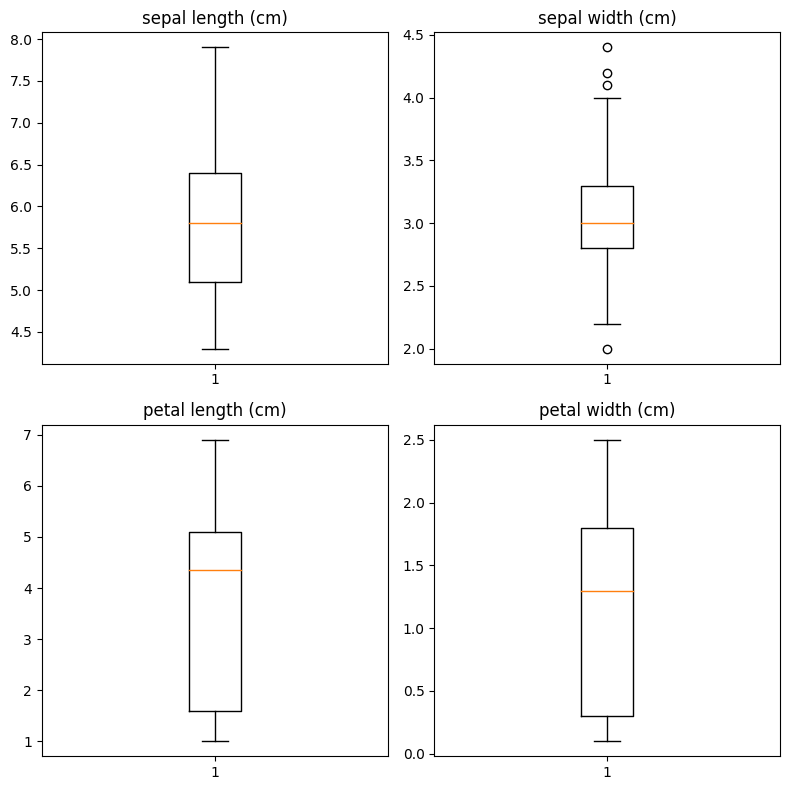

In [5]:
num_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
num_attributes = 4
num_cols = 2
num_rows = -(-num_attributes // num_cols)

fig_width = 4 * num_cols
fig_height = 4 * num_rows


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

axes = axes.flatten()

for i, col in enumerate(num_features):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.tight_layout()

plt.show()

# Random Forest Clasifier, KNN Classifier and Decision Tree Classifier before Dimensionality Reduction

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['target'], axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<Axes: xlabel='count', ylabel='target'>

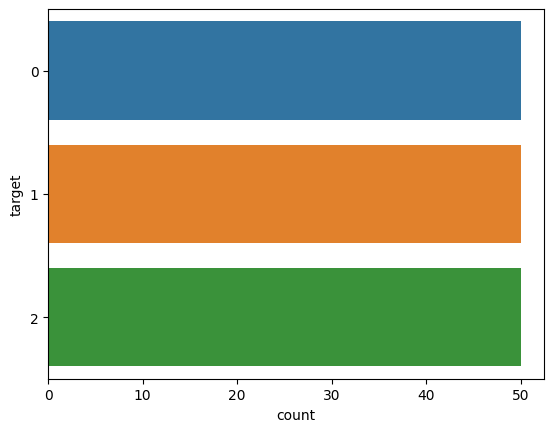

In [7]:
sns.countplot(y = Y, data=df)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [9]:
def evaluate_classifier(classifier, X_train, X_test, Y_train, Y_test):
    classifier.fit(X_train, Y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)

    train_accuracy = accuracy_score(Y_train, y_pred_train)
    test_accuracy = accuracy_score(Y_test, y_pred_test)

    print(f'Training Accuracy: {train_accuracy:.2f}')
    print(f'Testing Accuracy: {test_accuracy:.2f}')
    print("Classification Report:")
    print(classification_report(Y_test, y_pred_test))
    cmatrix(Y_test, y_pred_test)

In [10]:
def cmatrix(Y_test, Y_pred):

  conf_matrix = confusion_matrix(Y_test, Y_pred)

  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=df['target'].unique(), yticklabels=df['target'].unique())
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


Random Forest Classifier before Dimensionality Reduction: 
Training Accuracy: 1.00
Testing Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



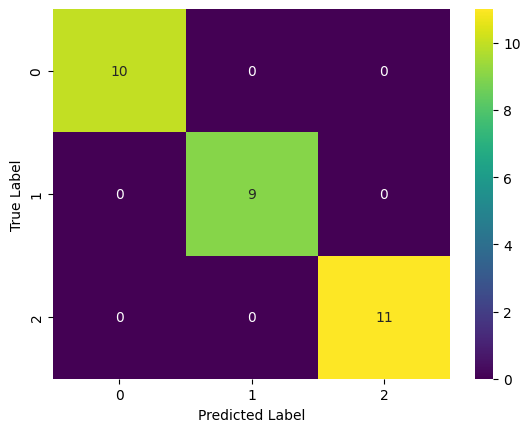

In [11]:
rfc = RandomForestClassifier(random_state=42)
print("\nRandom Forest Classifier before Dimensionality Reduction: ")
evaluate_classifier(rfc, X_train, X_test, Y_train, Y_test)


KNN Classifier before Dimensionality Reduction: 
Training Accuracy: 0.97
Testing Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



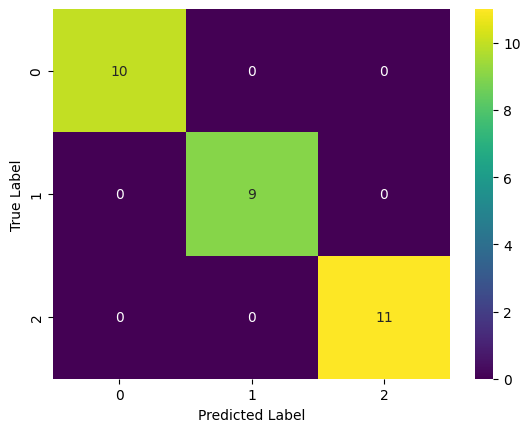

In [12]:
knn_classifier = KNeighborsClassifier()

print("\nKNN Classifier before Dimensionality Reduction: ")
evaluate_classifier(knn_classifier, X_train, X_test, Y_train, Y_test)


Decision Tree Classifier before Dimensionality Reduction: 
Training Accuracy: 1.00
Testing Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



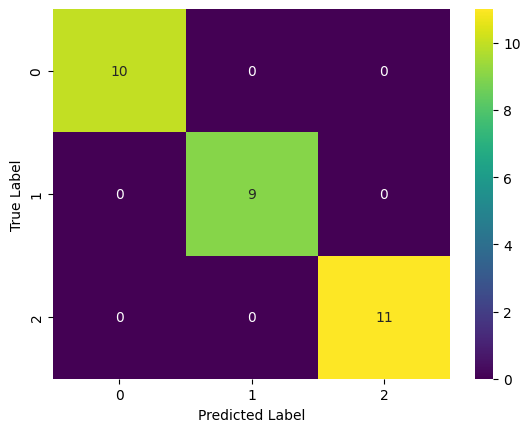

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=42)
print("\nDecision Tree Classifier before Dimensionality Reduction: ")
evaluate_classifier(dt_classifier, X_train, X_test, Y_train, Y_test)

Before Dimensionality Reduction: All three classifiers (KNN, Decision Tree, Random Forest) are overfitted models. This is because the data is completely devoid of noise, there are too less attributes and very less number of sample points.

# PCA for Dimensionality Reduction

In [14]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
# Print the variance of the principal components
variance_ratios = pca.explained_variance_ratio_
variance = pca.explained_variance_

for i in range(n_components):
    print(f'Variance of Principal Component {i+1}: {variance[i]:.4f}  Variance Ratio: {variance_ratios[i]:.4f}')


Variance of Principal Component 1: 4.6387  Variance Ratio: 0.9447
Variance of Principal Component 2: 0.1839  Variance Ratio: 0.0375



Random Forest Classifier after PCA:
Training Accuracy: 1.00
Testing Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



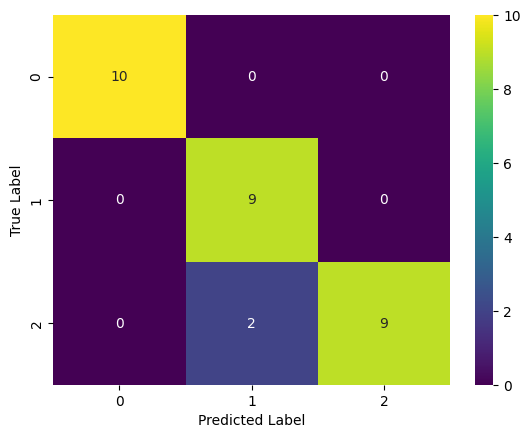

In [15]:
print("\nRandom Forest Classifier after PCA:")
evaluate_classifier(rfc, X_pca_train, X_pca_test, Y_train, Y_test)

KNN Classifier after PCA:
Training Accuracy: 0.97
Testing Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



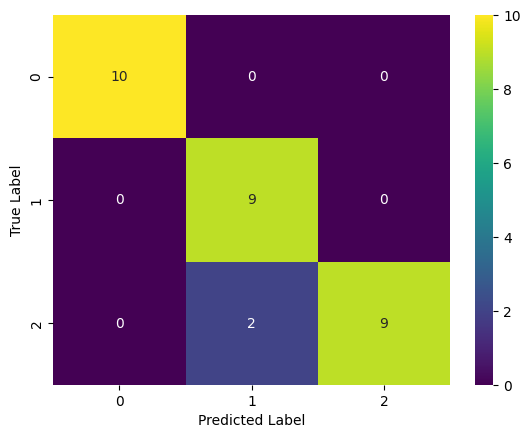

In [16]:
print("KNN Classifier after PCA:")
evaluate_classifier(knn_classifier, X_pca_train, X_pca_test, Y_train, Y_test)


Decision Tree Classifier after PCA:
Training Accuracy: 1.00
Testing Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



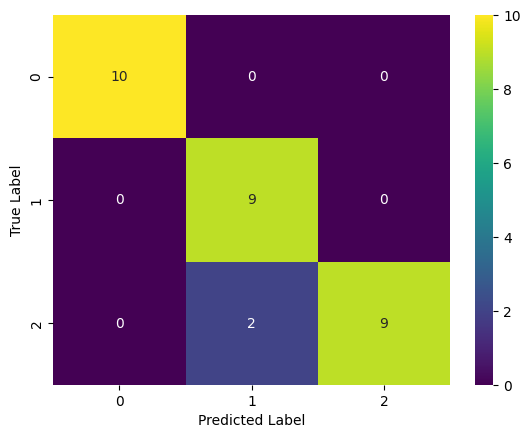

In [17]:
print("\nDecision Tree Classifier after PCA:")
evaluate_classifier(dt_classifier, X_pca_train, X_pca_test, Y_train, Y_test)

After PCA Dimensionality Reduction:
The accuracy remains the same after PCA, which indicates that all of them are overfitted models and dimensionality reduction will not change an overfitted model into a more practical model, even though we capture the important information in the data by the reduced components. Along with that, Dimensionality Reduction techniques on data with already less number of attributes(dimensions) is unnecessary, because it will not change the accuracy of the model whatsoever.

# LDA for Dimensionality Reduction

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA for dimensionality reduction
n_components = min(X_train.shape[1], len(set(Y_train)) - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda_train = lda.fit_transform(X_train, Y_train)
X_lda_test = lda.transform(X_test)

# Print the variance of the explained variance ratios
explained_variance_ratios_lda = lda.explained_variance_ratio_

for i in range(len(explained_variance_ratios_lda)):
    print(f'Explained Variance Ratio of Discriminant {i+1}: {explained_variance_ratios_lda[i]:.4f}')

Explained Variance Ratio of Discriminant 1: 0.9923
Explained Variance Ratio of Discriminant 2: 0.0077



Random Forest Classifier after LDA:
Training Accuracy: 1.00
Testing Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



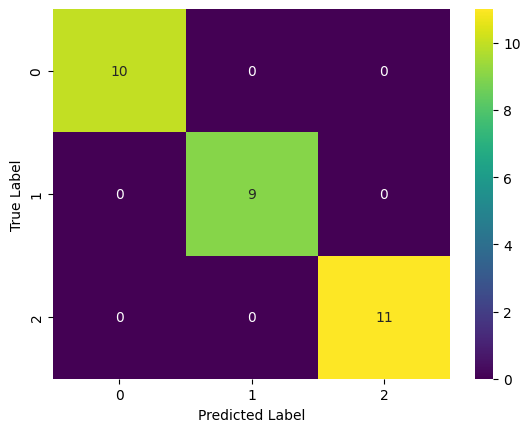

In [19]:
print("\nRandom Forest Classifier after LDA:")
evaluate_classifier(rfc, X_lda_train, X_lda_test, Y_train, Y_test)

KNN Classifier after LDA:
Training Accuracy: 0.98
Testing Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



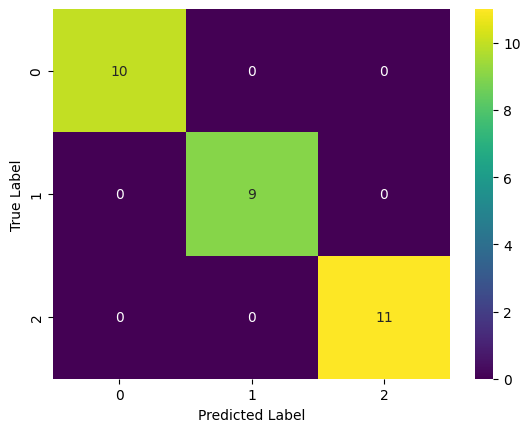

In [20]:
print("KNN Classifier after LDA:")
evaluate_classifier(knn_classifier, X_lda_train, X_lda_test, Y_train, Y_test)


Decision Tree Classifier after LDA:
Training Accuracy: 1.00
Testing Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



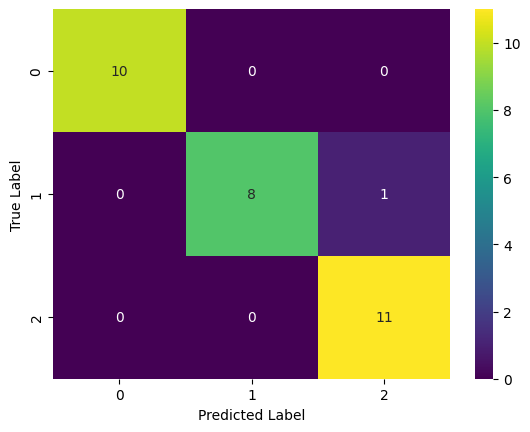

In [21]:
print("\nDecision Tree Classifier after LDA:")
evaluate_classifier(dt_classifier, X_lda_train, X_lda_test, Y_train, Y_test)

LDA is particularly useful when dealing with classification tasks.
It aims to maximize the separation between classes, making it effective for discriminative analysis. LDA does not change the accuracy values in the IRIS dataset because of the same reasons as mentioned after PCA.




# **Breast Cancer Dataset**

In [22]:
data1 = datasets.load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data=data1.data, columns=data1.feature_names)
df['target'] = data1.target

In [23]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Preprocessing

In [24]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Random Forest Classifier, KNN and Decision Tree Classifier before Dimensionality Reduction

In [25]:
X = df.drop(columns = ['target'], axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<Axes: xlabel='count', ylabel='target'>

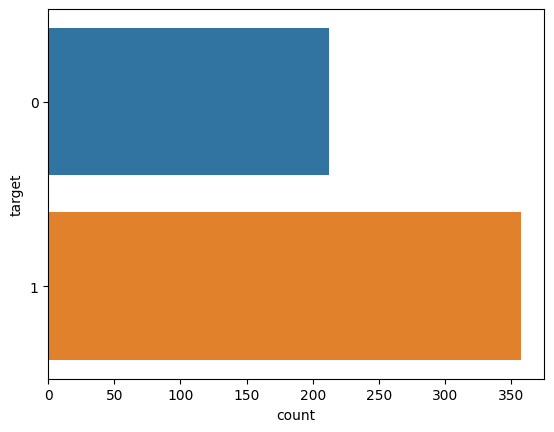

In [26]:
sns.countplot(y = Y, data=df)


Random Forest Classifier before Dimensionality Reduction: 
Training Accuracy: 1.00
Testing Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



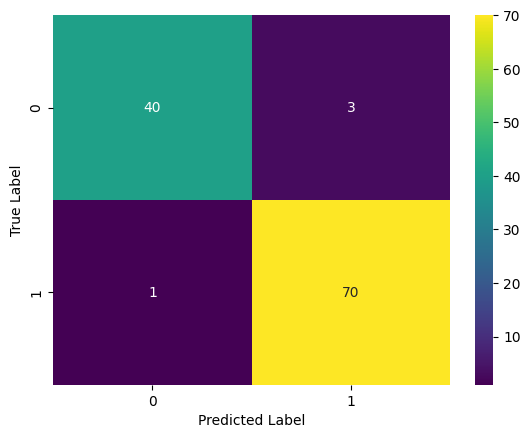

In [27]:
print("\nRandom Forest Classifier before Dimensionality Reduction: ")
evaluate_classifier(rfc, X_train, X_test, Y_train, Y_test)


KNN Classifier before Dimensionality Reduction: 
Training Accuracy: 0.94
Testing Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



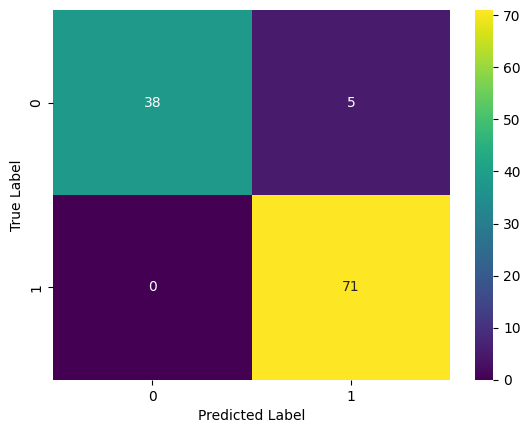

In [28]:
print("\nKNN Classifier before Dimensionality Reduction: ")
evaluate_classifier(knn_classifier, X_train, X_test, Y_train, Y_test)


Decision Tree Classifier before Dimensionality Reduction: 
Training Accuracy: 1.00
Testing Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



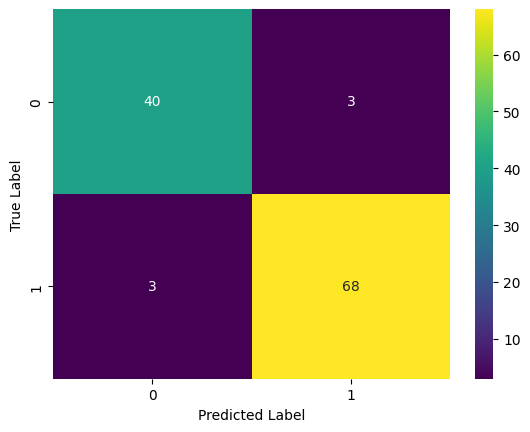

In [29]:
print("\nDecision Tree Classifier before Dimensionality Reduction: ")
evaluate_classifier(dt_classifier, X_train, X_test, Y_train, Y_test)

# PCA for Dimensionality Reduction

In [30]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
# Print the variance of the principal components
variance_ratios = pca.explained_variance_ratio_
variance = pca.explained_variance_

for i in range(n_components):
    print(f'Variance of Principal Component {i+1}: {variance[i]:.4f}  Variance Ratio: {variance_ratios[i]:.4f}')


Variance of Principal Component 1: 446659.8627  Variance Ratio: 0.9835
Variance of Principal Component 2: 7159.8421  Variance Ratio: 0.0158



Random Forest Classifier after PCA:
Training Accuracy: 1.00
Testing Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85        43
           1       0.97      0.82      0.89        71

    accuracy                           0.87       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.89      0.87      0.87       114



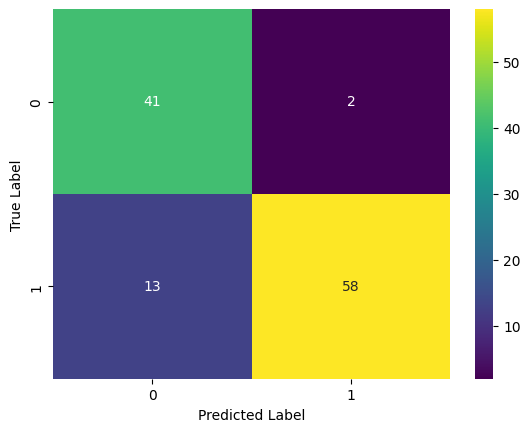

In [31]:
print("\nRandom Forest Classifier after PCA:")
evaluate_classifier(rfc, X_pca_train, X_pca_test, Y_train, Y_test)


KNN Classifier after PCA:
Training Accuracy: 0.93
Testing Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        43
           1       0.94      0.83      0.88        71

    accuracy                           0.86       114
   macro avg       0.85      0.87      0.86       114
weighted avg       0.87      0.86      0.86       114



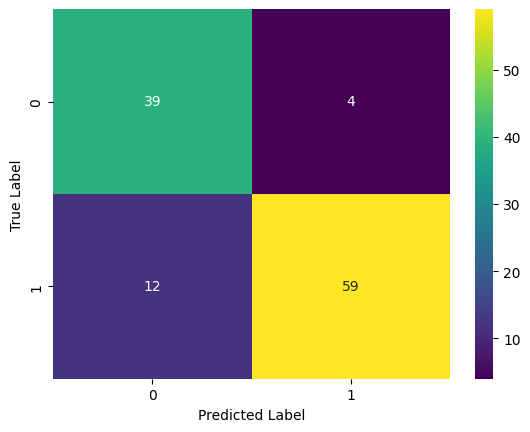

In [32]:
print("\nKNN Classifier after PCA:")
evaluate_classifier(knn_classifier, X_pca_train, X_pca_test, Y_train, Y_test)


Random Forest Classifier after PCA:
Training Accuracy: 1.00
Testing Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        43
           1       0.95      0.82      0.88        71

    accuracy                           0.86       114
   macro avg       0.85      0.87      0.86       114
weighted avg       0.88      0.86      0.86       114



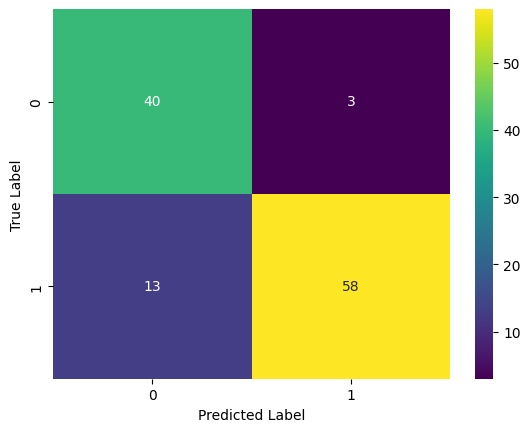

In [33]:
print("\nRandom Forest Classifier after PCA:")
evaluate_classifier(dt_classifier, X_pca_train, X_pca_test, Y_train, Y_test)

After PCA Dimensionality Reduction:
The accuracy decreases after PCA, which indicates that the entire data is not completely captured by the 2 principal components.

# LDA for Dimensionality Reduction

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA for dimensionality reduction
n_components = min(X_train.shape[1], len(set(Y_train)) - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda_train = lda.fit_transform(X_train, Y_train)
X_lda_test = lda.transform(X_test)

# Print the variance of the explained variance ratios
explained_variance_ratios_lda = lda.explained_variance_ratio_

for i in range(len(explained_variance_ratios_lda)):
    print(f'Explained Variance Ratio of Discriminant {i+1}: {explained_variance_ratios_lda[i]:.4f}')

Explained Variance Ratio of Discriminant 1: 1.0000



Random Forest Classifier after LDA:
Training Accuracy: 1.00
Testing Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



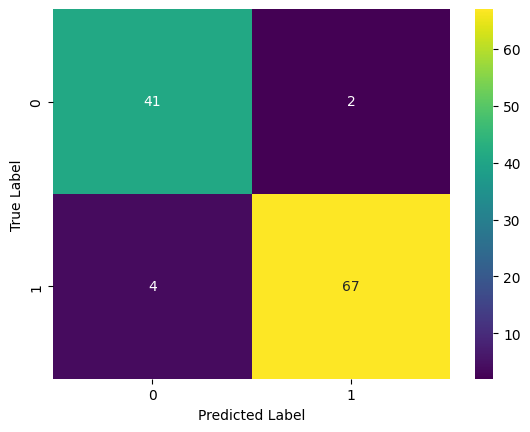

In [35]:
print("\nRandom Forest Classifier after LDA:")
evaluate_classifier(rfc, X_lda_train, X_lda_test, Y_train, Y_test)

KNN Classifier after LDA:
Training Accuracy: 0.99
Testing Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



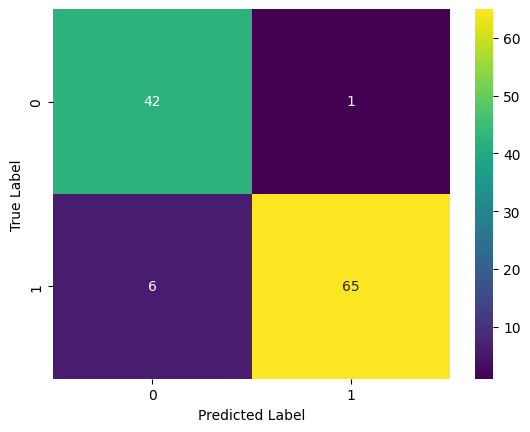

In [36]:
print("KNN Classifier after LDA:")
evaluate_classifier(knn_classifier, X_lda_train, X_lda_test, Y_train, Y_test)


Decision Tree Classifier after LDA:
Training Accuracy: 1.00
Testing Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



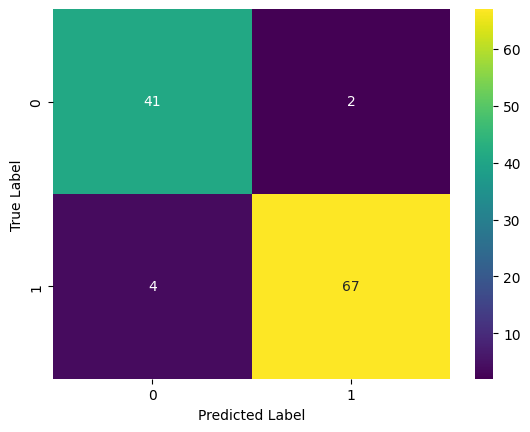

In [37]:
print("\nDecision Tree Classifier after LDA:")
evaluate_classifier(dt_classifier, X_lda_train, X_lda_test, Y_train, Y_test)

LDA is particularly useful when dealing with classification tasks.
It aims to maximize the separation between classes, making it effective for discriminative analysis. LDA increases the accuracy values in the breast cancer dataset, however PCa decreases the accuracy values as compared to the accuracy values before using any Dimensionality Reduction Techniques.




# **Diabetes Dataset**

In [38]:
diabetes = datasets.load_diabetes()

# Create a DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = np.where(diabetes.target > 140, 1, 0)

The original diabetes dataset is mostly used for regression tasks since the target variable is continuous in nature (indicating diabetes progression). Since we want to build a classification model,we convert the target variable into a binary classification by setting a threshold on the target variable.

In [39]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0


In [40]:
df.shape

(442, 11)

In [41]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

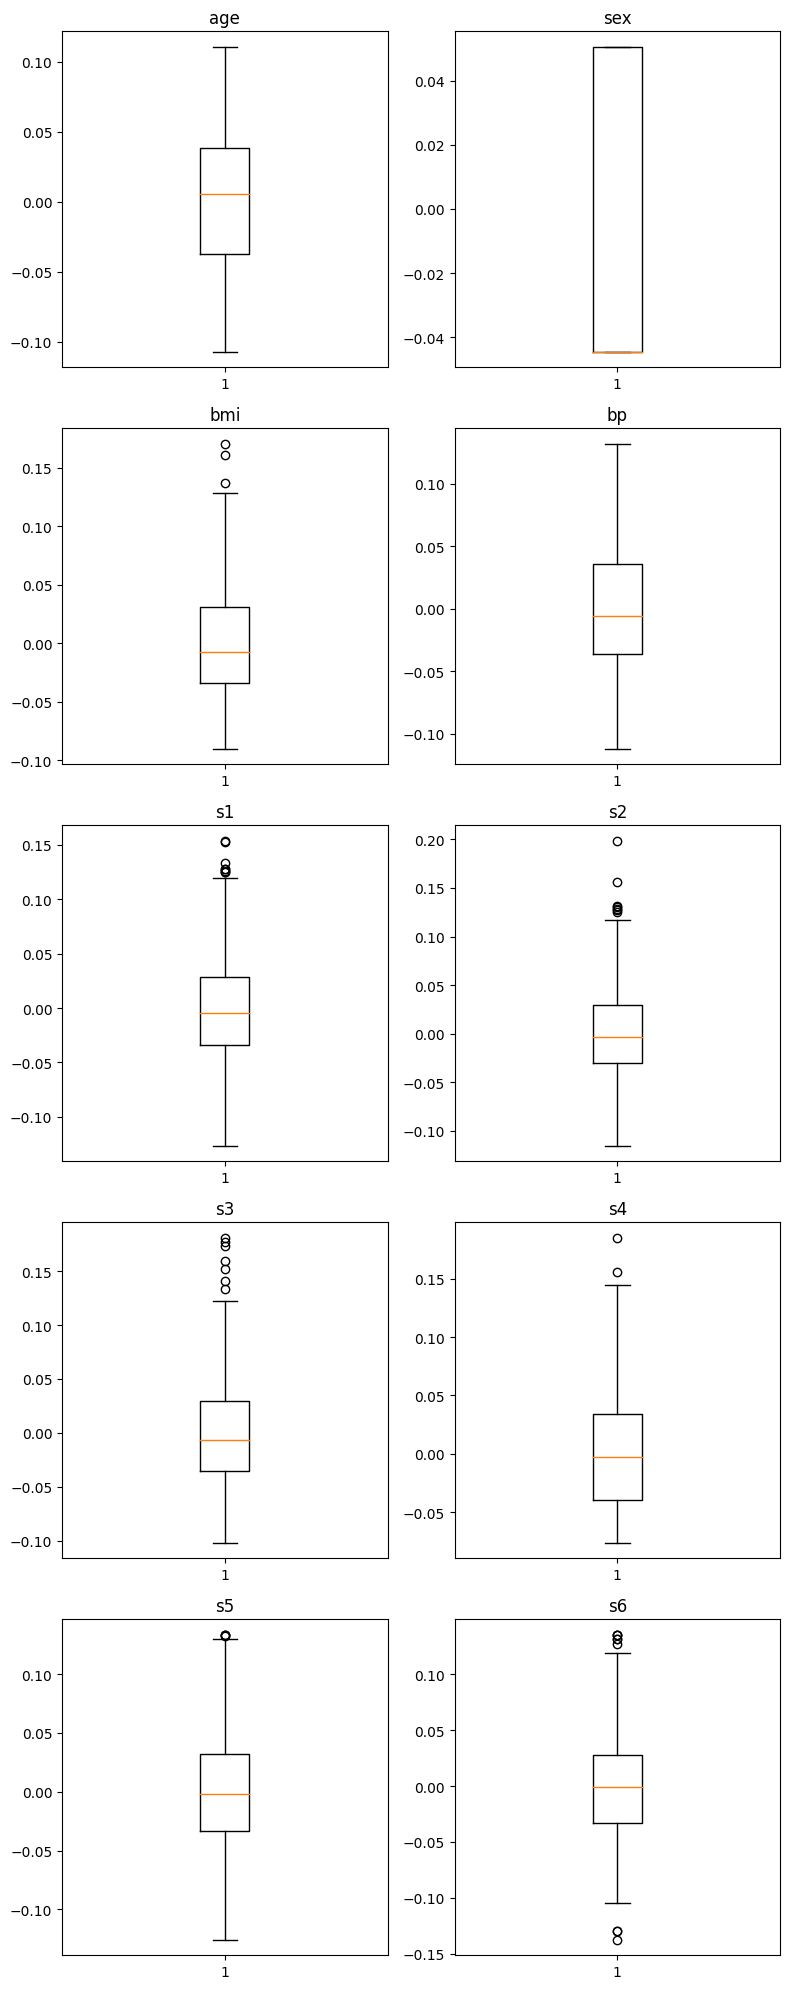

In [42]:
num_features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
num_attributes = 10
num_cols = 2
num_rows = -(-num_attributes // num_cols)

fig_width = 4 * num_cols
fig_height = 4 * num_rows


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

axes = axes.flatten()

for i, col in enumerate(num_features):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.tight_layout()

plt.show()

# Random Forest Clasifier, KNN Classifier and Decision Tree Classifier before Dimensionality Reduction

In [43]:
X = df.drop(columns = ['target'], axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<Axes: xlabel='count', ylabel='target'>

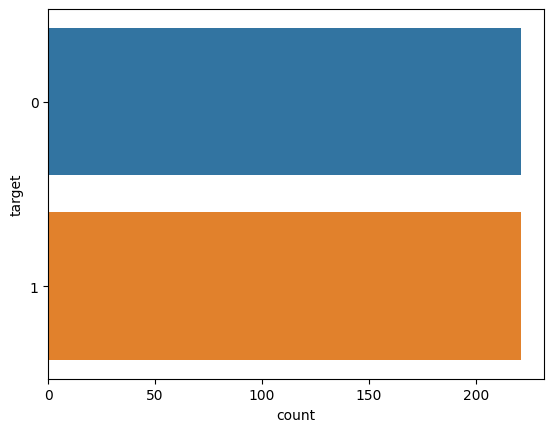

In [44]:
sns.countplot(y = Y, data=df)


Random Forest Classifier before Dimensionality Reduction: 
Training Accuracy: 1.00
Testing Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89



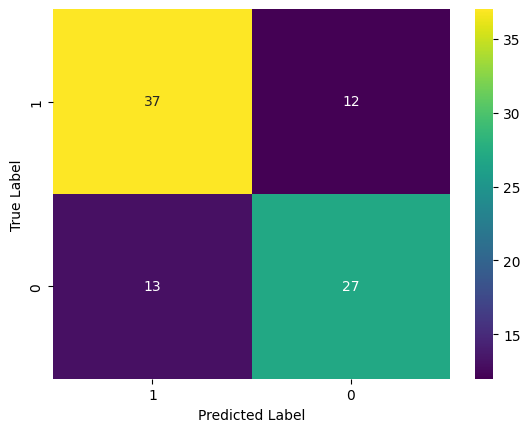

In [45]:
print("\nRandom Forest Classifier before Dimensionality Reduction: ")
evaluate_classifier(rfc, X_train, X_test, Y_train, Y_test)


KNN Classifier before Dimensionality Reduction: 
Training Accuracy: 0.79
Testing Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        49
           1       0.65      0.65      0.65        40

    accuracy                           0.69        89
   macro avg       0.68      0.68      0.68        89
weighted avg       0.69      0.69      0.69        89



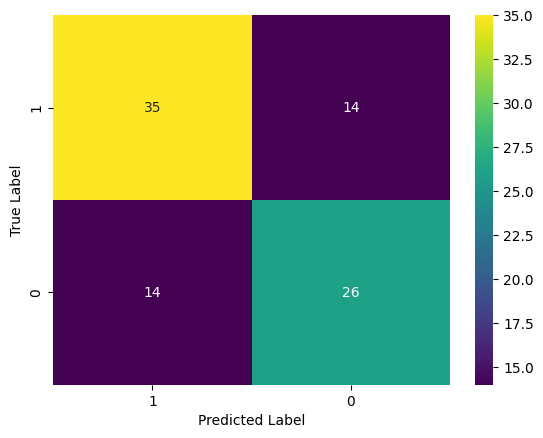

In [46]:
print("\nKNN Classifier before Dimensionality Reduction: ")
evaluate_classifier(knn_classifier, X_train, X_test, Y_train, Y_test)


KNN Classifier before Dimensionality Reduction: 
Training Accuracy: 0.79
Testing Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        49
           1       0.65      0.65      0.65        40

    accuracy                           0.69        89
   macro avg       0.68      0.68      0.68        89
weighted avg       0.69      0.69      0.69        89



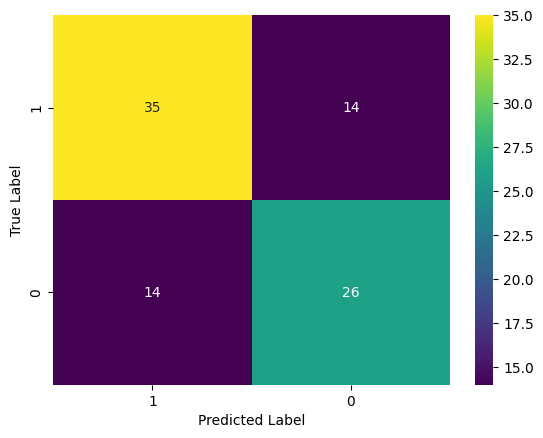

In [47]:
print("\nKNN Classifier before Dimensionality Reduction: ")
evaluate_classifier(knn_classifier, X_train, X_test, Y_train, Y_test)


Decision Tree Classifier before Dimensionality Reduction: 
Training Accuracy: 1.00
Testing Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71        49
           1       0.64      0.62      0.63        40

    accuracy                           0.67        89
   macro avg       0.67      0.67      0.67        89
weighted avg       0.67      0.67      0.67        89



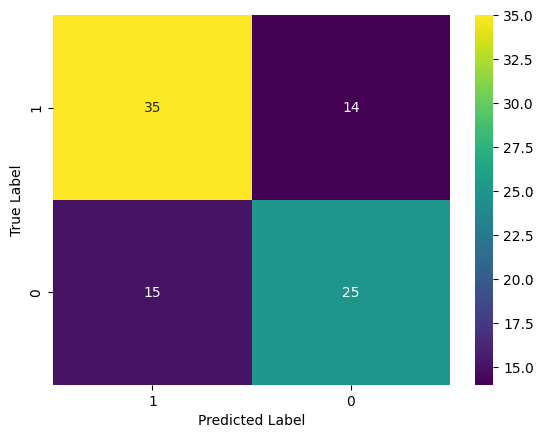

In [48]:
print("\nDecision Tree Classifier before Dimensionality Reduction: ")
evaluate_classifier(dt_classifier, X_train, X_test, Y_train, Y_test)

Before Dimensionality Reduction:
The dataset is more complex, and the classifiers exhibit lower accuracy compared to the other datasets.
KNN performs relatively better (in both testing and training case) than Decision Tree and Random Forest.


# PCA for Dimensionality Reduction

In [49]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
# Print the variance of the principal components
variance_ratios = pca.explained_variance_ratio_
variance = pca.explained_variance_

for i in range(n_components):
    print(f'Variance of Principal Component {i+1}: {variance[i]:.4f}  Variance Ratio: {variance_ratios[i]:.4f}')


Variance of Principal Component 1: 0.0097  Variance Ratio: 0.4283
Variance of Principal Component 2: 0.0036  Variance Ratio: 0.1574



Random Forest Classifier after PCA:
Training Accuracy: 1.00
Testing Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        49
           1       0.56      0.68      0.61        40

    accuracy                           0.62        89
   macro avg       0.62      0.62      0.62        89
weighted avg       0.63      0.62      0.62        89



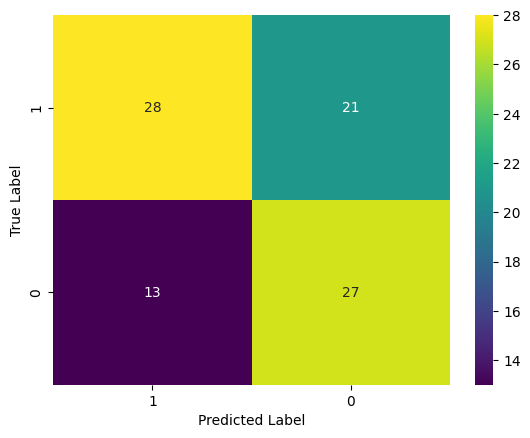

In [50]:
print("\nRandom Forest Classifier after PCA:")
evaluate_classifier(rfc, X_pca_train, X_pca_test, Y_train, Y_test)


KNN Classifier after PCA:
Training Accuracy: 0.79
Testing Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        49
           1       0.60      0.65      0.63        40

    accuracy                           0.65        89
   macro avg       0.65      0.65      0.65        89
weighted avg       0.65      0.65      0.65        89



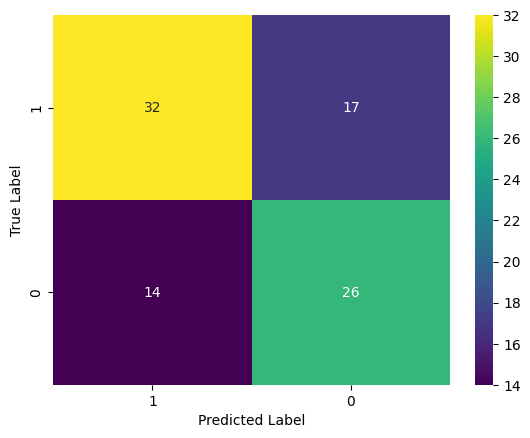

In [51]:
print("\nKNN Classifier after PCA:")
evaluate_classifier(knn_classifier, X_pca_train, X_pca_test, Y_train, Y_test)


Decision Tree Classifier after PCA:
Training Accuracy: 1.00
Testing Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.59      0.64        49
           1       0.57      0.68      0.62        40

    accuracy                           0.63        89
   macro avg       0.63      0.63      0.63        89
weighted avg       0.64      0.63      0.63        89



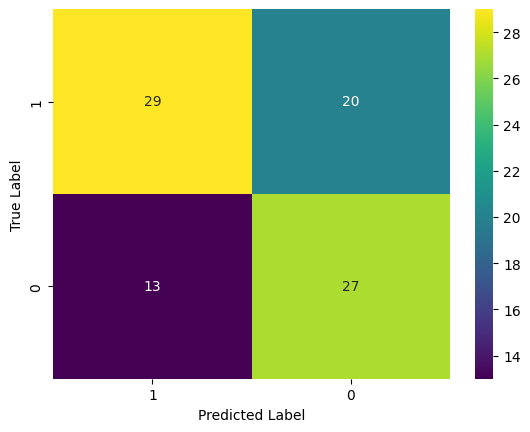

In [52]:
print("\nDecision Tree Classifier after PCA:")
evaluate_classifier(dt_classifier, X_pca_train, X_pca_test, Y_train, Y_test)

Simple datasets like Iris may not benefit significantly from dimensionality reduction. For more complex datasets  like the Diabetes dataset, the accuracy increases based on the choice of dimensionality reduction technique and its impact depend on the data's intrinsic structure. Here, we can see PCA is not much efective in improving the model accuracy.

# LDA for Dimensionality Reduction

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA for dimensionality reduction
n_components = min(X_train.shape[1], len(set(Y_train)) - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda_train = lda.fit_transform(X_train, Y_train)
X_lda_test = lda.transform(X_test)

# Print the variance of the explained variance ratios
explained_variance_ratios_lda = lda.explained_variance_ratio_

for i in range(len(explained_variance_ratios_lda)):
    print(f'Explained Variance Ratio of Discriminant {i+1}: {explained_variance_ratios_lda[i]:.4f}')

Explained Variance Ratio of Discriminant 1: 1.0000



Random Forest Classifier after LDA:
Training Accuracy: 1.00
Testing Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        49
           1       0.76      0.72      0.74        40

    accuracy                           0.78        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.77      0.78      0.77        89



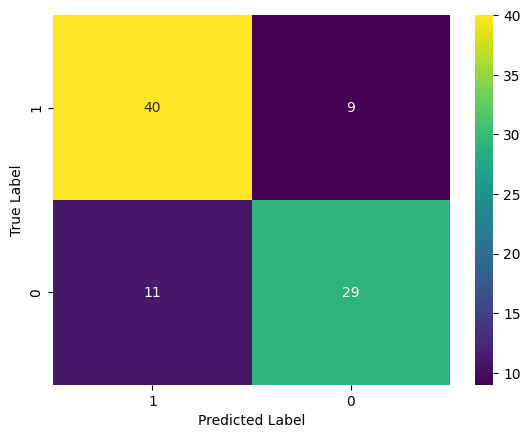

In [54]:
print("\nRandom Forest Classifier after LDA:")
evaluate_classifier(rfc, X_lda_train, X_lda_test, Y_train, Y_test)


KNN Classifier after LDA:
Training Accuracy: 0.77
Testing Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        49
           1       0.78      0.80      0.79        40

    accuracy                           0.81        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.81      0.81      0.81        89



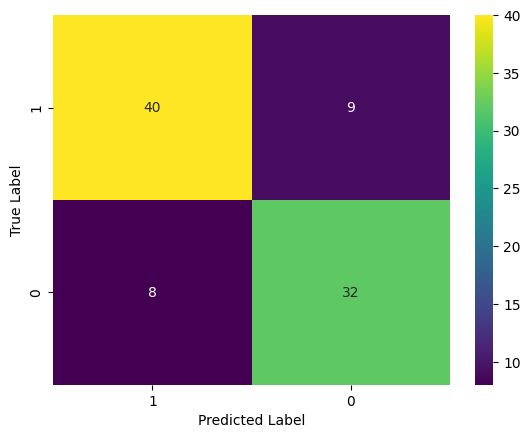

In [55]:
print("\nKNN Classifier after LDA:")
evaluate_classifier(knn_classifier, X_lda_train, X_lda_test, Y_train, Y_test)


Decision Tree Classifier after LDA:
Training Accuracy: 1.00
Testing Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        49
           1       0.76      0.72      0.74        40

    accuracy                           0.78        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.77      0.78      0.77        89



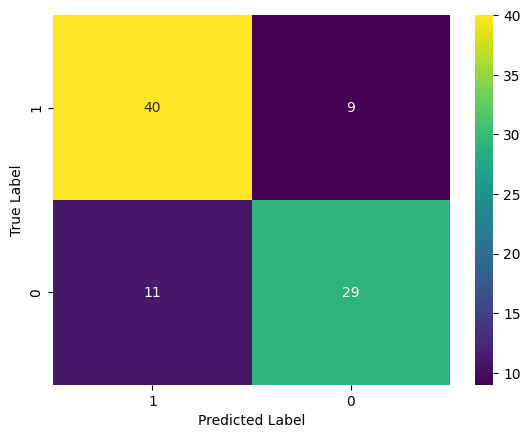

In [56]:
print("\nDecision Tree Classifier after LDA:")
evaluate_classifier(dt_classifier, X_lda_train, X_lda_test, Y_train, Y_test)

Clearly, there has been a significant increase in the accuracy percentage of all the three models, especially KNN classifier. Therefore, we can clearly interpret that LDA is a dimensionality reduction technique extremely suited for classification models.